## 윌콕슨 맨 휘트니 검정
비모수적인 방법으로, 두 개의 관련 표본을 비교하는 검정 방법
짝을 이룬 표본을 비교할 때 사용한다. (동일한 대상의 전후 관찰 등)
이 때, 두 표본이 서로 대응되는 데이터라는 것이 중요하다. 예를 들어, 같은 사람들이 전후 각각 다른 약을 복용하여 그 차이를 비교하는 경우 등이 있다.
이 검정은 먼저 각 대응 쌍에 대해 차이를 계산하고, 이 차이들의 순위를 매긴다. 이후, 순위 합계를 이용하여 검정 통계량을 계산한다. 검정 통계량의 분포는 자유도가 n-1인 표준 정규분포와 유사하다.
결과적으로, 검정 통계량과 p-value를 계산하여, 통계적으로 유의한 차이가 있는지를 검정한다. p-value가 일정 기준값보다 작으면, 두 표본 간의 차이가 통계적으로 유의하다고 판단할 수 있다. 그렇지 않으면, 두 표본 간의 차이는 통계적으로 유의하지 않다고 판단한다.

<br>
윌콕슨 부호 순위 검정에서 자유도는 샘플의 크기에서 각 쌍의 순위 차이가 모두 다른 경우, 즉 tied된 경우에만 계산된다. 이 때는 각 tied된 값들의 순위 중간값을 사용하여 순위를 매긴 후에, 공식에 따라 자유도를 계산한다.
(윌콕슨 맨 휘트니 검정에서 tied란 같은 값을 가진 데이터가 여러 개 있는 경우를 의미)<br>
자유도는 검정 통계량에서 제한된 정보의 양으로, 검정통계량이 자유도보다 크면 p-value가 작아지므로 귀무가설을 기각할 가능성이 높아진다. 따라서 자유도가 높을수록 검정의 민감도가 높아진다.

### 윌콕슨 맨 휘트니 검정
주어진 데이터를 하나의 순위화된 데이터로 변환하여, 각각의 데이터가 두 집단 중 어느 쪽에 속하는지 판단하고 이를 기반으로 검정을 수행한다. 이 때 순위화 과정에서 동점이 발생할 수 있는데, 이 경우 랜덤으로 순위를 부여한다. 따라서, 이 검정 방법은 중앙값을 중심으로 두 집단의 차이를 비교한다.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

data = {'group1' : [3, 2, 5, 1, 4, 2, 6, 7, 9, 8],
       'group2' : [6, 4, 7, 2, 6, 3, 7, 9, 10, 11]}

df = pd.DataFrame(data)
df.to_csv('./data/mannwhitneyu_sample_data.csv', index = False)

In [5]:
data = pd.read_csv('./data/mannwhitneyu_sample_data.csv')

# 두 집단 간의 차이
st, p = mannwhitneyu(data['group1'], data['group2'])
print(st, p)

if p > 0.05:
    print("fail to reject H0")
else:
    print("reject H0")

32.5 0.19622288836173518
fail to reject H0


## 시각화

C:\Users\smjin\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


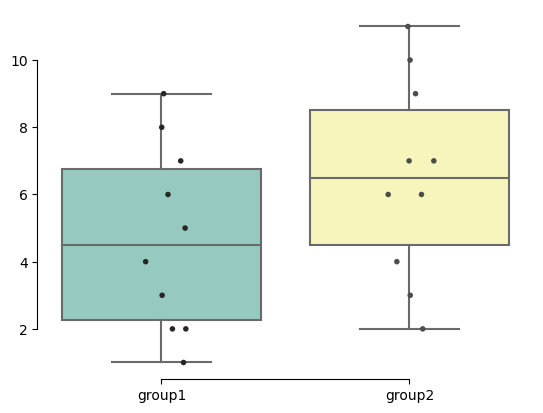

In [6]:
sns.boxplot(data = data[['group1', 'group2']], palette='Set3')
sns.stripplot(data = data[['group1', 'group2']], color='.3', size=4)
sns.despine(trim = True)
plt.show()

윌콕슨 부호 순위 검정과 윌콕슨 맨 휘트니 검정의 차이

<윌콕슨 부호 순위 검정>
- 단일 집단에서 중앙값을 기준으로 하여 두 개의 표본 비교
- 두 개의 표본이 서로 독립적이지 않으며, 각 쌍의 관측치 사이의 차이가 0인지 아닌지를 검정하는 방법
- 정규분포를 따르지 않는 경우에도 사용 가능

<윌콕슨 맨 휘트니 검정>
- 두 개의 집단에서 랜덤 샘플을 추출하여 순위를 매긴 후, 각 집단의 순위 합을 비교하는 검정 방법
- 두 개의 표본이 서로 독립적이며, 각 집단의 분포가 동일한 경우에 사용 가능
- 또한, 정규분포를 따르지 않는 경우에도 사용 가능

따라서, 윌콕슨 부호 순위 검정은 단일 집단에서 중앙값을 비교하는 검정, 윌콕슨 맨 휘트니 검정은 두 개의 독립적인 집단에서 평균이 아닌 순위 합을 비교하는 검정